In [190]:
import numpy as np
import pandas as pd

import mido
import ast
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os


### Preparing data

In [191]:
#      DIRECTORIES
######################

scores_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM_stimuli/stim_scripts/train_analysis/scores'
figs_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM_stimuli/stim_scripts/train_analysis/figures'
files = sorted(glob.glob(os.path.join(scores_dir,'*.csv')))

df_scores = pd.DataFrame()

for file in files:
    df = pd.read_csv(file)
    df_scores = pd.concat([df_scores, df])


# DEFINING PARTICIPANT GROUPS
subjects = df_scores['subject'].unique()
musicians = [2, 6, 7, 12]

In [192]:
def ave_score(score_df, period):
    means = []
    subjects = []
    musicianship = []
    for subject in df_scores['subject'].unique():
        if subject in musicians:
            is_musician = 1
        else: 
            is_musician = 0
        musicianship.append(is_musician)
        if period == 'pre':
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject) & (df_scores['trial_number']<=82)]['score'])
        elif period == 'post':
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject) & (df_scores['trial_number']>=82)]['score'])
        elif period == 'beginning1': 
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject) & (df_scores['trial_number']<=10)]['score'])
        elif period == 'beginning2': 
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject) & (df_scores['trial_number']>82)& (df_scores['trial_number']<=92)]['score'])

        elif period == 'all':
            mean_sub = np.mean(df_scores[(df_scores['subject'] == subject)]['score'])
        else:
            print('Valid periods are pre, post, and all')
            
        means.append(mean_sub)
        subjects.append(subject)

    ave_df = pd.DataFrame({'subject': subjects, 'score': means, 'period': period, 'musician': musicianship})

    return ave_df

### Overall scores over 2 blocks, musician vs nonmusician

#### Stats

In [193]:
means_pre = ave_score(df_scores, 'pre')
means_post = ave_score(df_scores, 'post')
means_overall = pd.concat([means_pre, means_post])

In [194]:
#mixed-effects model
mixed_model = smf.mixedlm("score ~ period * musician", means_overall, groups=means_overall["subject"])
mixed_results = mixed_model.fit()
print(mixed_results.summary())

              Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    score   
No. Observations:      24         Method:                REML    
No. Groups:            12         Scale:                 0.0321  
Min. group size:       2          Log-Likelihood:        -11.0282
Max. group size:       2          Converged:             Yes     
Mean group size:       2.0                                       
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               2.786    0.180 15.495 0.000  2.434  3.139
period[T.pre]          -0.157    0.090 -1.749 0.080 -0.332  0.019
musician                0.617    0.311  1.983 0.047  0.007  1.228
period[T.pre]:musician  0.168    0.155  1.081 0.280 -0.136  0.472
Group Var               0.227    0.857                           



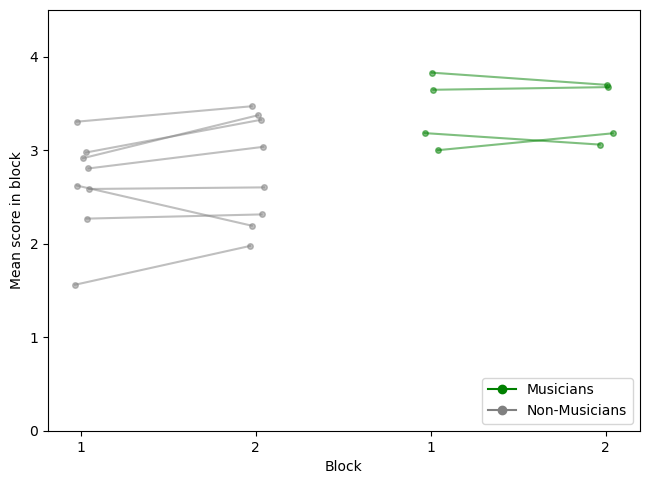

In [195]:
for subject in subjects:

    subject_means_pre = means_pre[means_pre['subject'] == subject]['score']
    subject_means_post = means_post[means_post['subject'] == subject]['score']

    jitter = np.random.uniform(-0.05, 0.05)
    if subject in musicians: 
        colour = 'green'
        x = [3 + jitter, 4 + jitter]

    else:
        colour = 'grey'
        x = [1 + jitter, 2 + jitter]


    plt.plot(x, [subject_means_pre, subject_means_post], "o-", label=subject, color = colour, alpha = 0.5, markersize = 4)


#stats

#plt.title('Individual scores pre- and post-training')
plt.xticks([1, 2, 3, 4], ['1', '2', '1', '2']) 
plt.yticks([0,1,2,3,4])
#plt.legend(loc='lower right')
plt.tight_layout()
plt.ylabel('Mean score in block')
plt.xlabel('Block')
plt.ylim(0,4.5)
plt.legend(handles=[plt.Line2D([], [], color='green', marker='o', linestyle='-'),
                    plt.Line2D([], [], color='grey', marker='o', linestyle='-')],
           labels=['Musicians', 'Non-Musicians'], loc='lower right')
plt.savefig(figs_dir+'/train_scores_all.svg', dpi = 200)

### Scores for first 10 trials of each block

#### Stats

In [196]:
means_pre_10 = ave_score(df_scores, 'beginning1')
means_post_10 = ave_score(df_scores, 'beginning2')
means_10 = pd.concat([means_pre_10, means_post_10])

In [197]:
mixed_model = smf.mixedlm("score ~ period * musician", means_10, groups=means_10["subject"])
mixed_results = mixed_model.fit()
print(mixed_results.summary())

                 Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       score   
No. Observations:       24            Method:                   REML    
No. Groups:             12            Scale:                    0.2124  
Min. group size:        2             Log-Likelihood:           -21.9060
Max. group size:        2             Converged:                Yes     
Mean group size:        2.0                                             
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      2.763    0.231 11.934 0.000  2.309  3.216
period[T.beginning2]           0.738    0.230  3.200 0.001  0.286  1.189
musician                       0.912    0.401  2.276 0.023  0.127  1.698
period[T.beginning2]:musician -0.788    0.399 -1.973 0.049 -1.570 -0.

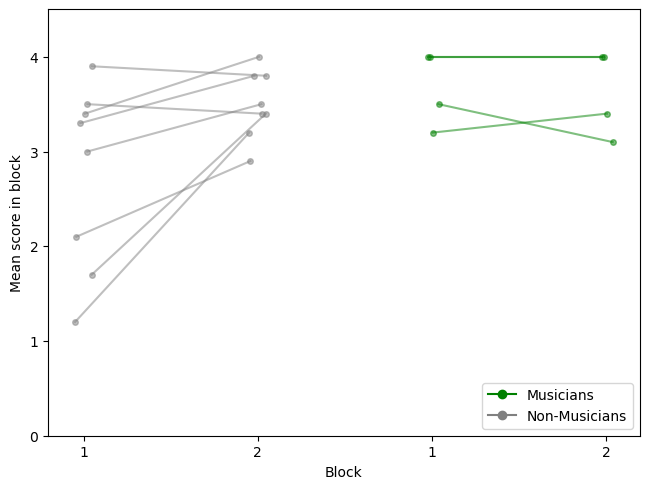

In [198]:
for subject in subjects:

    subject_means_pre = means_pre_10[means_pre_10['subject'] == subject]['score']
    subject_means_post = means_post_10[means_post_10['subject'] == subject]['score']

    jitter = np.random.uniform(-0.05, 0.05)
    if subject in musicians: 
        colour = 'green'
        x = [3 + jitter, 4 + jitter]

    else:
        colour = 'grey'
        x = [1 + jitter, 2 + jitter]


    plt.plot(x, [subject_means_pre, subject_means_post], "o-", label=subject, color = colour, alpha = 0.5, markersize = 4)


#stats

#plt.title('Individual scores pre- and post-training')
plt.xticks([1, 2, 3, 4], ['1', '2', '1', '2']) 
plt.yticks([0,1,2,3,4])
#plt.legend(loc='lower right')
plt.tight_layout()
plt.ylabel('Mean score in block')
plt.xlabel('Block')
plt.ylim(0,4.5)
plt.legend(handles=[plt.Line2D([], [], color='green', marker='o', linestyle='-'),
                    plt.Line2D([], [], color='grey', marker='o', linestyle='-')],
           labels=['Musicians', 'Non-Musicians'], loc='lower right')
plt.savefig(figs_dir+'/train_scores_10.svg', dpi = 200)

In [199]:
"""for i in range(len(means_pre)):
    jitter = np.random.uniform(-0.05,0.05)
    x = [1+jitter,2+jitter] 
    plt.plot(x, [means_pre[i], means_post[i]], marker = 'o',markersize = 3, color = 'green', alpha = 0.4)


#plt.scatter(x, [np.mean(means_pre), np.mean(means_post)], color = 'green')
plt.xticks([1,2])
plt.xlabel('Block')
plt.ylabel('Mean score')"""

"for i in range(len(means_pre)):\n    jitter = np.random.uniform(-0.05,0.05)\n    x = [1+jitter,2+jitter] \n    plt.plot(x, [means_pre[i], means_post[i]], marker = 'o',markersize = 3, color = 'green', alpha = 0.4)\n\n\n#plt.scatter(x, [np.mean(means_pre), np.mean(means_post)], color = 'green')\nplt.xticks([1,2])\nplt.xlabel('Block')\nplt.ylabel('Mean score')"

In [200]:
"""#rolling ave over trials
smoothness = 15

plt.figure(figsize=(10,5))

k = 0.25

for subject in subjects:
    colour = [0.1, k, 0.6]
    k+=0.1
    for i in range(2):
        rolling_corr = df_scores[(df_scores['block']==i+1) & (df_scores['subject'] == subject)]['correct'].rolling(smoothness).mean()
        plt.plot(rolling_corr, label = subject, color = colour)


plt.xlabel("Trial")
plt.ylabel("Rolling average score over 10 trials")
   """

'#rolling ave over trials\nsmoothness = 15\n\nplt.figure(figsize=(10,5))\n\nk = 0.25\n\nfor subject in subjects:\n    colour = [0.1, k, 0.6]\n    k+=0.1\n    for i in range(2):\n        rolling_corr = df_scores[(df_scores[\'block\']==i+1) & (df_scores[\'subject\'] == subject)][\'correct\'].rolling(smoothness).mean()\n        plt.plot(rolling_corr, label = subject, color = colour)\n\n\nplt.xlabel("Trial")\nplt.ylabel("Rolling average score over 10 trials")\n   '

In [201]:
#scores sorted by difficulty

"""sub_colour = 0.1
for subject in subjects:
    for block in range(1,3):
        res_temp = df_scores[(df_scores['block']==block) & (df_scores['subject'] ==subject)]

        diff_score = []
        for i in range(1,5):
            diff = res_temp[res_temp['type'] == i]
            diff_score.append(np.mean(diff['correct']))
            #score = np.mean(diff['correct'])
            #plt.scatter(i, score, c = (0.5, 0.5, float(block)/5), cmap='blues')
        if block == 1:
            block_style = '--'
        elif block ==2:
            block_style = '-'
        plt.plot(np.arange(1, 5, 1), diff_score, c = (0.5, 0.5, sub_colour), marker = '.', linestyle = block_style, label = block)
    sub_colour +=0.2

plt.legend(loc = 'upper right', title = "Block")
plt.ylabel('Perfect response rate')
plt.xlabel('Number of different notes in melody')
plt.xticks(np.arange(1, 5, 1))"""

'sub_colour = 0.1\nfor subject in subjects:\n    for block in range(1,3):\n        res_temp = df_scores[(df_scores[\'block\']==block) & (df_scores[\'subject\'] ==subject)]\n\n        diff_score = []\n        for i in range(1,5):\n            diff = res_temp[res_temp[\'type\'] == i]\n            diff_score.append(np.mean(diff[\'correct\']))\n            #score = np.mean(diff[\'correct\'])\n            #plt.scatter(i, score, c = (0.5, 0.5, float(block)/5), cmap=\'blues\')\n        if block == 1:\n            block_style = \'--\'\n        elif block ==2:\n            block_style = \'-\'\n        plt.plot(np.arange(1, 5, 1), diff_score, c = (0.5, 0.5, sub_colour), marker = \'.\', linestyle = block_style, label = block)\n    sub_colour +=0.2\n\nplt.legend(loc = \'upper right\', title = "Block")\nplt.ylabel(\'Perfect response rate\')\nplt.xlabel(\'Number of different notes in melody\')\nplt.xticks(np.arange(1, 5, 1))'

### Scores by number of notes in melody

Considering all trials

In [202]:


# Initialize empty lists to store data
subjects = []
blocks = []
scores = []
types = []

# Loop through unique subjects and blocks
for subject in df_scores['subject'].unique():
    for block in range(1, 3):
        # Calculate percent correct for the subject and block
        for type in range(2,5):
         score = df_scores[(df_scores['subject'] == subject) & (df_scores['block'] == block) & (df_scores['type'] == type)]['score'].mean()
         
         # Append data to lists
         subjects.append(subject)
         blocks.append(block)
         scores.append(score)
         types.append(type)

# Create DataFrame from lists
scores_bytype = pd.DataFrame({'subject': subjects, 'block': blocks, 'type': types, 'score': scores})


In [203]:
"""
# Add individual data points
#sns.swarmplot(data=correct_df, x='type', y='percent_correct', hue='block', color='black', dodge=True)
# Create the boxplot
ax = sns.boxplot(data=correct_df, x='type', y='percent_correct', hue='block', palette='pastel')

# Set labels for x and y-axis
ax.set_xlabel('Number of unique pitches in melody')
ax.set_ylabel('Rate of perfect responses')"""


"\n# Add individual data points\n#sns.swarmplot(data=correct_df, x='type', y='percent_correct', hue='block', color='black', dodge=True)\n# Create the boxplot\nax = sns.boxplot(data=correct_df, x='type', y='percent_correct', hue='block', palette='pastel')\n\n# Set labels for x and y-axis\nax.set_xlabel('Number of unique pitches in melody')\nax.set_ylabel('Rate of perfect responses')"

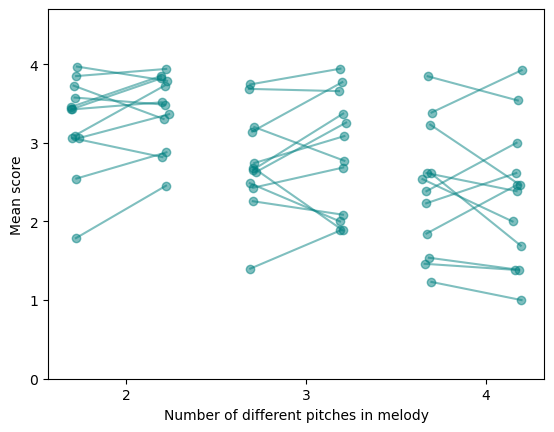

In [219]:
mel_types = [2,3,4]
plt.figure()
x = [1,2]


for mel_type in mel_types:
    for subject in scores_bytype['subject'].unique():
        jitter = np.random.uniform(-0.05, 0.05)
        x = [i + jitter for i in x]
        pre_score = scores_bytype[(scores_bytype['subject'] == subject) & (scores_bytype['type'] == mel_type) & (scores_bytype['block'] == 1)]['score']
        post_score = scores_bytype[(scores_bytype['subject'] == subject) & (scores_bytype['type'] == mel_type) & (scores_bytype['block'] == 2)]['score']
        plt.plot(x, [pre_score, post_score], 'o-', alpha = 0.5, color = 'teal')
    x = [i+2 for i in x]

plt.xticks([1.5, 3.5, 5.5], ['2', '3', '4'])
plt.yticks([0, 1, 2, 3, 4])
plt.ylim(0,4.7)
plt.ylabel('Mean score')
plt.xlabel('Number of different pitches in melody')
plt.savefig(figs_dir+'/scores_bytype_all.svg')

Stats

In [205]:
mixed_model = smf.mixedlm("score ~ block * type", scores_bytype, groups=scores_bytype["subject"])
mixed_results = mixed_model.fit()
print(mixed_results.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: score   
No. Observations: 72      Method:             REML    
No. Groups:       12      Scale:              0.1342  
Min. group size:  6       Log-Likelihood:     -50.6507
Max. group size:  6       Converged:          Yes     
Mean group size:  6.0                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    3.617    0.548  6.596 0.000  2.542  4.692
block        0.443    0.329  1.347 0.178 -0.201  1.087
type        -0.292    0.167 -1.744 0.081 -0.619  0.036
block:type  -0.127    0.106 -1.200 0.230 -0.334  0.080
Group Var    0.365    0.493                           



In [211]:
scores_first10_1 = df_scores[df_scores['trial_number'] <= 10]
scores_first10_2 = df_scores[(df_scores['trial_number']>82) & (df_scores['trial_number']<=92)]
scores_first10 = pd.concat([scores_first10_1, scores_first10_2])

In [213]:
mixed_model = smf.mixedlm("score ~ block * type", scores_first10, groups=scores_first10["subject"])
mixed_results = mixed_model.fit()
print(mixed_results.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: score    
No. Observations: 240     Method:             REML     
No. Groups:       12      Scale:              1.3959   
Min. group size:  20      Log-Likelihood:     -391.1916
Max. group size:  20      Converged:          Yes      
Mean group size:  20.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     2.092    1.116  1.874 0.061 -0.096  4.279
block         0.808    0.699  1.156 0.247 -0.562  2.178
type          0.250    0.539  0.464 0.643 -0.807  1.307
block:type   -0.167    0.341 -0.489 0.625 -0.835  0.502
Group Var     0.289    0.132                           



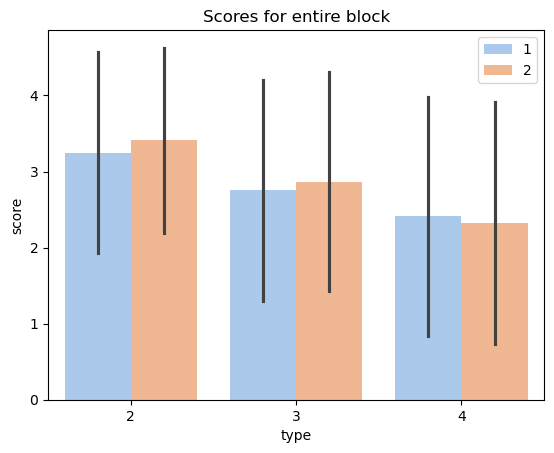

In [208]:

# Assuming df_scores is your DataFrame
# Adjust 'type', 'score', and 'block' accordingly
fig = sns.barplot(data=df_scores[df_scores['type'] != 1], x='type', y='score', hue='block', errorbar='sd', palette='pastel')
fig.set_title('Scores for entire block')
fig.legend()

In [209]:
df_fl = pd.DataFrame()
for subject in df_scores['subject'].unique():
    print(subject)

    df_sub = df_scores[df_scores['subject']==subject]
    #df_sub = df_scores[(df_scores['subject']==subject) & (df_scores['type']!=1)]

    df_flsub = pd.concat([df_sub.iloc[0:10], df_sub.iloc[82:92]])
    df_fl = pd.concat([df_fl, df_flsub])




1
2
3
4
5
6
7
8
9
10
11
12


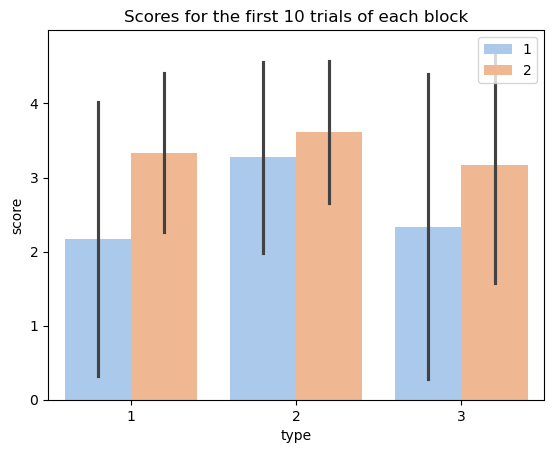

In [210]:
fig = sns.barplot(data = df_fl, x = 'type', y = 'score', hue = 'block', palette= 'pastel', errorbar= 'sd')
fig.set_title('Scores for the first 10 trials of each block')
fig.legend(loc = 'upper right')
#fig.set_ylim(3,4.5)